In [1]:
#!pip install akshare quantstats

import warnings
warnings.filterwarnings('ignore')
import time
import akshare as ak
import numpy as np
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# %matplotlib inline

In [2]:
etf_510050 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510050.csv")
etf_510300 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510300.csv")
etf_510500 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510500.csv")
etf_159915 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159915.csv")
etf_159901 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159901.csv")
etf_588000 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\588000.csv")

In [3]:
etf_510050 = etf_510050[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510300 = etf_510300[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510500 = etf_510500[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159915 = etf_159915[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159901 = etf_159901[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_588000 = etf_588000[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')

In [4]:
# Change the name of a column
etf_510050 = etf_510050.rename(columns={'AccumulatedUnitNV': "etf_510050"})
etf_510300 = etf_510300.rename(columns={'AccumulatedUnitNV': "etf_510300"})
etf_510500 = etf_510500.rename(columns={'AccumulatedUnitNV': "etf_510500"})
etf_159915 = etf_159915.rename(columns={'AccumulatedUnitNV': "etf_159915"})
etf_159901 = etf_159901.rename(columns={'AccumulatedUnitNV': "etf_159901"})
etf_588000 = etf_588000.rename(columns={'AccumulatedUnitNV': "etf_588000"})

In [5]:
len(etf_510050), len(etf_510300), len(etf_510500),len(etf_159915),len(etf_159901),len(etf_588000)

(4481, 2701, 2503, 2825, 4192, 630)

In [6]:
# 合并数据
data = pd.concat([etf_510050, etf_510300], axis=1)
data = pd.concat([data, etf_159915], axis=1)
data = pd.concat([data, etf_159901], axis=1)
data = pd.concat([data, etf_588000], axis=1)
data.index = pd.to_datetime(data.index)

In [7]:
# 计算每日涨跌幅和滚动收益率
data["etf_510050_day_return"] = data.etf_510050.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510300_day_return"] = data.etf_510300.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159915_day_return"] = data.etf_159915.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159901_day_return"] = data.etf_159901.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_588000_day_return"] = data.etf_588000.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])

In [8]:
# 生成交易信号和收益率_21
data["etf_510050_return"] = data.etf_510050.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510300_return"] = data.etf_510300.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159915_return"] = data.etf_159915.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159901_return"] = data.etf_159901.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_588000_return"] = data.etf_588000.rolling(window=21).apply(lambda x: x[-1]/x[0])

In [9]:
data = data.iloc[21:,:]

In [10]:
data["signal_510050"] = [0] * len(data)
data["signal_510300"] = [0] * len(data)
data["signal_159915"] = [0] * len(data)
data["signal_159901"] = [0] * len(data)
data["signal_588000"] = [0] * len(data)

In [11]:
for row in range(len(data)):
    value = data.iloc[row][10:15].max()
    series = data.iloc[row]
    position = series[series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position + 5
    data.loc[data.index[row],series.index[new_position]] = 1

In [12]:
data["signal_510050"] = data["signal_510050"].shift(1)
data["signal_510300"] = data["signal_510300"].shift(1)
data["signal_159915"] = data["signal_159915"].shift(1)
data["signal_159901"] = data["signal_159901"].shift(1)
data["signal_588000"] = data["signal_588000"].shift(1)

In [13]:
data = data[1:]

In [14]:
data["signal_return_21"] = [0] * len(data)
arr = []
for row in range(len(data)):
    value = data.iloc[row][15:20].max()
    series = data.iloc[row]
    position = series[15:20][series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position - 10
    arr.append(series[new_position] + 1)

#     data.loc[data.index[row],'signal_return_21'] = np.cumprod((series[new_position] + 1))*100
data['arr'] = arr
data["signal_return_21"] = np.cumprod(arr, axis=0)*100

In [15]:
#####################################################################
data['signal_return_21'] = data['signal_return_21']*(100/data.loc[:,"signal_return_21"][0])
data['etf_510050_return'] = data['etf_510050_return']*(100/data.loc[:,"etf_510050_return"][0])
data['etf_510300_return'] = data['etf_510300_return']*(100/data.loc[:,"etf_510300_return"][1783])
data['etf_159915_return'] = data['etf_159915_return']*(100/data.loc[:,"etf_159915_return"][1668])
data['etf_159901_return'] = data['etf_159901_return']*(100/data.loc[:,"etf_159901_return"][293])
data['etf_588000_return'] = data['etf_588000_return']*(100/data.loc[:,"etf_588000_return"][3857])

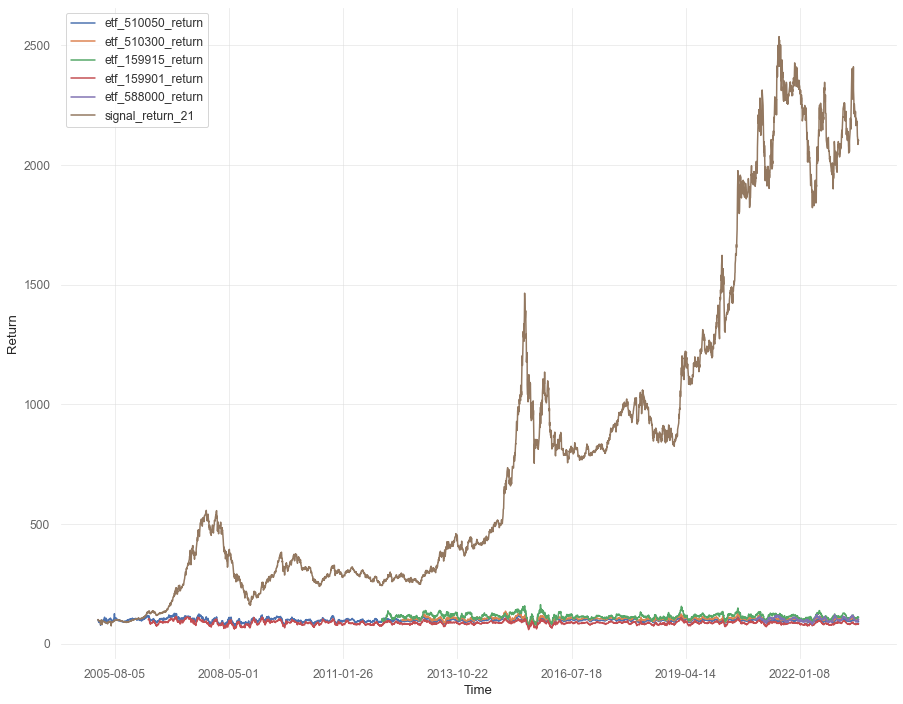

In [16]:
# 绘制曲线图
# %matplotlib notebook
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21']) 

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
# plt.show()

In [17]:
# 计算策略表现指标
result = {}
for i in ["signal_return_21", "etf_510050_return","etf_510300_return","etf_159915_return","etf_159901_return","etf_588000_return"]:
    result[i] = []
    for j in ["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"]:
        exec( f"r = qs.stats.{j}(data[i])")
        result[i].append(r)

result = pd.DataFrame(result, index=["avg_return", "volatility", "sharpe", "max_drawdown", "win_rate"])

print(result)

              signal_return_21  etf_510050_return  etf_510300_return  \
avg_return            0.000874           0.000243           0.000169   
volatility            0.298460           0.363016           0.227834   
sharpe                0.726472           0.168552           0.111957   
max_drawdown         -0.712332          -0.435360          -0.462180   
win_rate              0.525513           0.504713           0.516636   

              etf_159915_return  etf_159901_return  etf_588000_return  
avg_return             0.000417           0.000264           0.000309  
volatility             0.347548           0.380776           0.134870  
sharpe                 0.189043           0.162863           0.077706  
max_drawdown          -0.554438          -0.484155          -0.332944  
win_rate               0.498925           0.506724           0.505824  


### Comparison

In [18]:
comparison = data.copy()

In [29]:
etf_510050 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510050.csv")
etf_510300 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510300.csv")
etf_510500 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\510500.csv")
etf_159915 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159915.csv")
etf_159901 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\159901.csv")
etf_588000 = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\588000.csv")

In [30]:
etf_510050 = etf_510050[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510300 = etf_510300[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_510500 = etf_510500[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159915 = etf_159915[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_159901 = etf_159901[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')
etf_588000 = etf_588000[['EndDate', 'AccumulatedUnitNV']].set_index('EndDate')

In [31]:
# Change the name of a column
etf_510050 = etf_510050.rename(columns={'AccumulatedUnitNV': "etf_510050"})
etf_510300 = etf_510300.rename(columns={'AccumulatedUnitNV': "etf_510300"})
etf_510500 = etf_510500.rename(columns={'AccumulatedUnitNV': "etf_510500"})
etf_159915 = etf_159915.rename(columns={'AccumulatedUnitNV': "etf_159915"})
etf_159901 = etf_159901.rename(columns={'AccumulatedUnitNV': "etf_159901"})
etf_588000 = etf_588000.rename(columns={'AccumulatedUnitNV': "etf_588000"})

In [32]:
# 合并数据
data = pd.concat([etf_510050, etf_510300], axis=1)
data = pd.concat([data, etf_510500], axis=1)
data = pd.concat([data, etf_159915], axis=1)
data = pd.concat([data, etf_159901], axis=1)
data = pd.concat([data, etf_588000], axis=1)
data.index = pd.to_datetime(data.index)

In [33]:
# 计算每日涨跌幅和滚动收益率
data["etf_510050_day_return"] = data.etf_510050.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510300_day_return"] = data.etf_510300.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_510500_day_return"] = data.etf_510500.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159915_day_return"] = data.etf_159915.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_159901_day_return"] = data.etf_159901.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])
data["etf_588000_day_return"] = data.etf_588000.rolling(2).apply(lambda x:(x[-1]-x[0])/x[0])

In [34]:
# 生成交易信号和收益率_21
data["etf_510050_return"] = data.etf_510050.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510300_return"] = data.etf_510300.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_510500_return"] = data.etf_510500.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159915_return"] = data.etf_159915.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_159901_return"] = data.etf_159901.rolling(window=21).apply(lambda x: x[-1]/x[0])
data["etf_588000_return"] = data.etf_588000.rolling(window=21).apply(lambda x: x[-1]/x[0])

In [35]:
data = data.iloc[21:,:]

In [36]:
data["signal_510050"] = [0] * len(data)
data["signal_510300"] = [0] * len(data)
data["signal_510500"] = [0] * len(data)
data["signal_159915"] = [0] * len(data)
data["signal_159901"] = [0] * len(data)
data["signal_588000"] = [0] * len(data)

In [37]:
for row in range(len(data)):
    value = data.iloc[row][12:18].max()
    series = data.iloc[row]
    position = series[series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position + 6
    data.loc[data.index[row],series.index[new_position]] = 1

In [38]:
data["signal_510050"] = data["signal_510050"].shift(1)
data["signal_510300"] = data["signal_510300"].shift(1)
data["signal_510500"] = data["signal_510500"].shift(1)
data["signal_159915"] = data["signal_159915"].shift(1)
data["signal_159901"] = data["signal_159901"].shift(1)
data["signal_588000"] = data["signal_588000"].shift(1)

In [39]:
data = data[1:]

In [40]:
data["signal_return_21"] = [0] * len(data)
arr = []
for row in range(len(data)):
    value = data.iloc[row][18:24].max()
    series = data.iloc[row]
    position = series[18:24][series == value].idxmax()
    old_position = series.index.get_loc(position)
    new_position = old_position - 12
    arr.append(series[new_position] + 1)

#     data.loc[data.index[row],'signal_return_21'] = np.cumprod((series[new_position] + 1))*100
data['arr'] = arr
data["signal_return_21"] = np.cumprod(arr, axis=0)*100

In [41]:
#####################################################################
data['signal_return_21'] = data['signal_return_21']*(100/data.loc[:,"signal_return_21"][0])
data['etf_510050_return'] = data['etf_510050_return']*(100/data.loc[:,"etf_510050_return"][0])
data['etf_510300_return'] = data['etf_510300_return']*(100/data.loc[:,"etf_510300_return"][1783])
data['etf_510500_return'] = data['etf_510500_return']*(100/data.loc[:,"etf_510500_return"][1941])
data['etf_159915_return'] = data['etf_159915_return']*(100/data.loc[:,"etf_159915_return"][1668])
data['etf_159901_return'] = data['etf_159901_return']*(100/data.loc[:,"etf_159901_return"][293])
data['etf_588000_return'] = data['etf_588000_return']*(100/data.loc[:,"etf_588000_return"][3857])

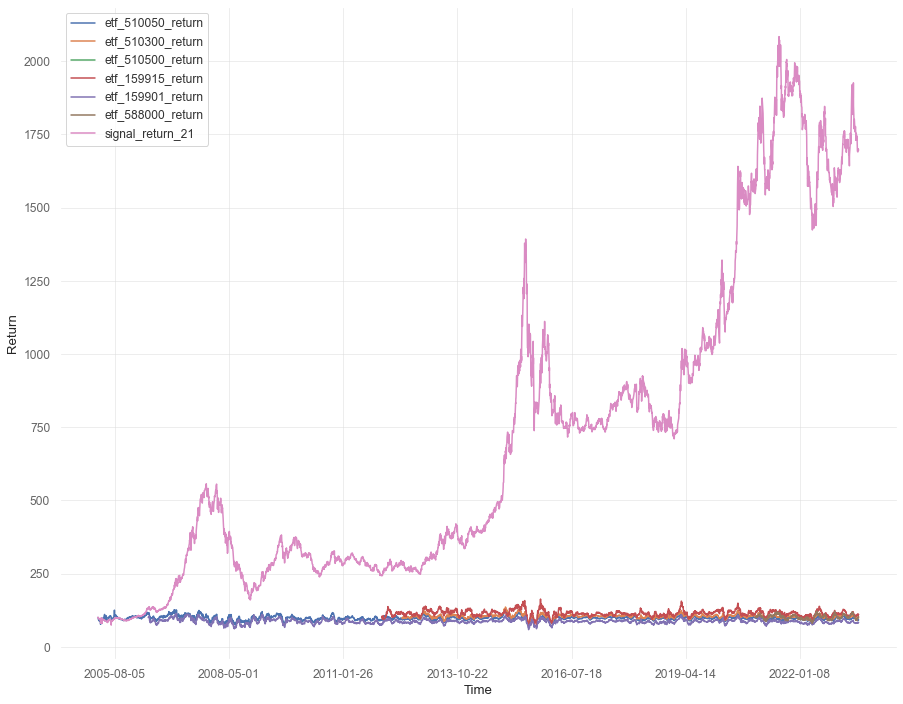

In [42]:
# 绘制曲线图
# %matplotlib notebook
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_510500_return"].index),data["etf_510500_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_510500_return", "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21']) 

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
# plt.show()

In [43]:
data

,etf_510050,etf_510300,etf_510500,etf_159915,etf_159901,etf_588000,etf_510050_day_return,etf_510300_day_return,etf_510500_day_return,etf_159915_day_return,...,etf_159901_return,etf_588000_return,signal_510050,signal_510300,signal_510500,signal_159915,signal_159901,signal_588000,signal_return_21,arr
EndDate,,,,,,,,,,,,,,,,,,,,,
2005-03-10,1.007,NaN,NaN,NaN,NaN,NaN,-0.021380,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.978620
2005-03-11,1.011,NaN,NaN,NaN,NaN,NaN,0.003972,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,100.397219,1.003972
2005-03-14,1.015,NaN,NaN,NaN,NaN,NaN,0.003956,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,100.794439,1.003956
2005-03-15,0.996,NaN,NaN,NaN,NaN,NaN,-0.018719,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,98.907646,0.981281
2005-03-16,0.986,NaN,NaN,NaN,NaN,NaN,-0.010040,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,97.914598,0.989960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,3.743,1.6463,1.9600,2.4726,5.3976,0.7556,-0.004256,0.000851,0.006212,0.006759,...,82.331627,100.698613,0.0,0.0,1.0,0.0,0.0,0.0,1700.516427,1.006212
2023-05-31,3.698,1.6326,1.9569,2.4451,5.3388,0.7630,-0.012022,-0.008322,-0.001582,-0.011122,...,80.879085,99.836229,0.0,0.0,1.0,0.0,0.0,0.0,1697.826835,0.998418
2023-06-01,3.707,1.6367,1.9586,2.4599,5.3750,0.7627,0.002434,0.002511,0.000869,0.006053,...,82.215451,102.001430,0.0,0.0,1.0,0.0,0.0,0.0,1699.301773,1.000869


In [46]:
data['(21)signal_return_21'] = comparison['signal_return_21']

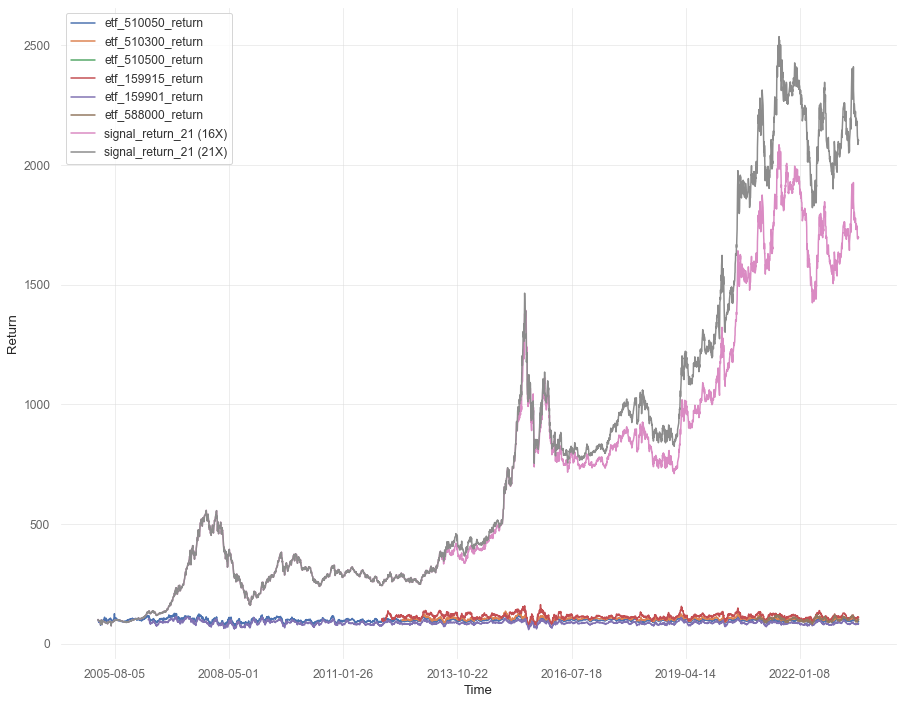

In [48]:
_ = plt.figure(figsize=(15, 12))
plt.xlabel('Time') 
plt.ylabel('Return')

_ = plt.plot(np.array(data["etf_510050_return"].index),data["etf_510050_return"].values)
_ = plt.plot(np.array(data["etf_510300_return"].index),data["etf_510300_return"].values)
_ = plt.plot(np.array(data["etf_510500_return"].index),data["etf_510500_return"].values)
_ = plt.plot(np.array(data["etf_159915_return"].index),data["etf_159915_return"].values)
_ = plt.plot(np.array(data["etf_159901_return"].index),data["etf_159901_return"].values)
_ = plt.plot(np.array(data["etf_588000_return"].index),data["etf_588000_return"].values)
_ = plt.plot(np.array(data["signal_return_21"].index),data["signal_return_21"].values)
_ = plt.plot(np.array(data["(21)signal_return_21"].index),data["(21)signal_return_21"].values)
_ = plt.legend(['etf_510050_return', 'etf_510300_return', "etf_510500_return", "etf_159915_return", 'etf_159901_return', "etf_588000_return", 'signal_return_21 (16X)', 'signal_return_21 (21X)']) 

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))